# Introduction
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.  The raw data is changed from listing the probability of admittance to a 'high' or 'low' chance of being admitted to a particular school.

This first step is to import necessary modules.

In [1]:
# Import necessary modules
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Import, explore and clean the data

In [2]:
import os
os.getcwd()

'C:\\Users\\Fred\\Documents\\PythonDirectory\\Unit 4'

In [3]:
df = pd.read_csv('Admission_Predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

In [5]:
print(df.shape)
print(df.dtypes)
print(df.isna().sum())

(400, 9)
Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


This data is already very clean.  The only cleaning needed is to drop the Serial number column and convert the chance of admittance to binary.  The pairplot below shows the relationships between the features.

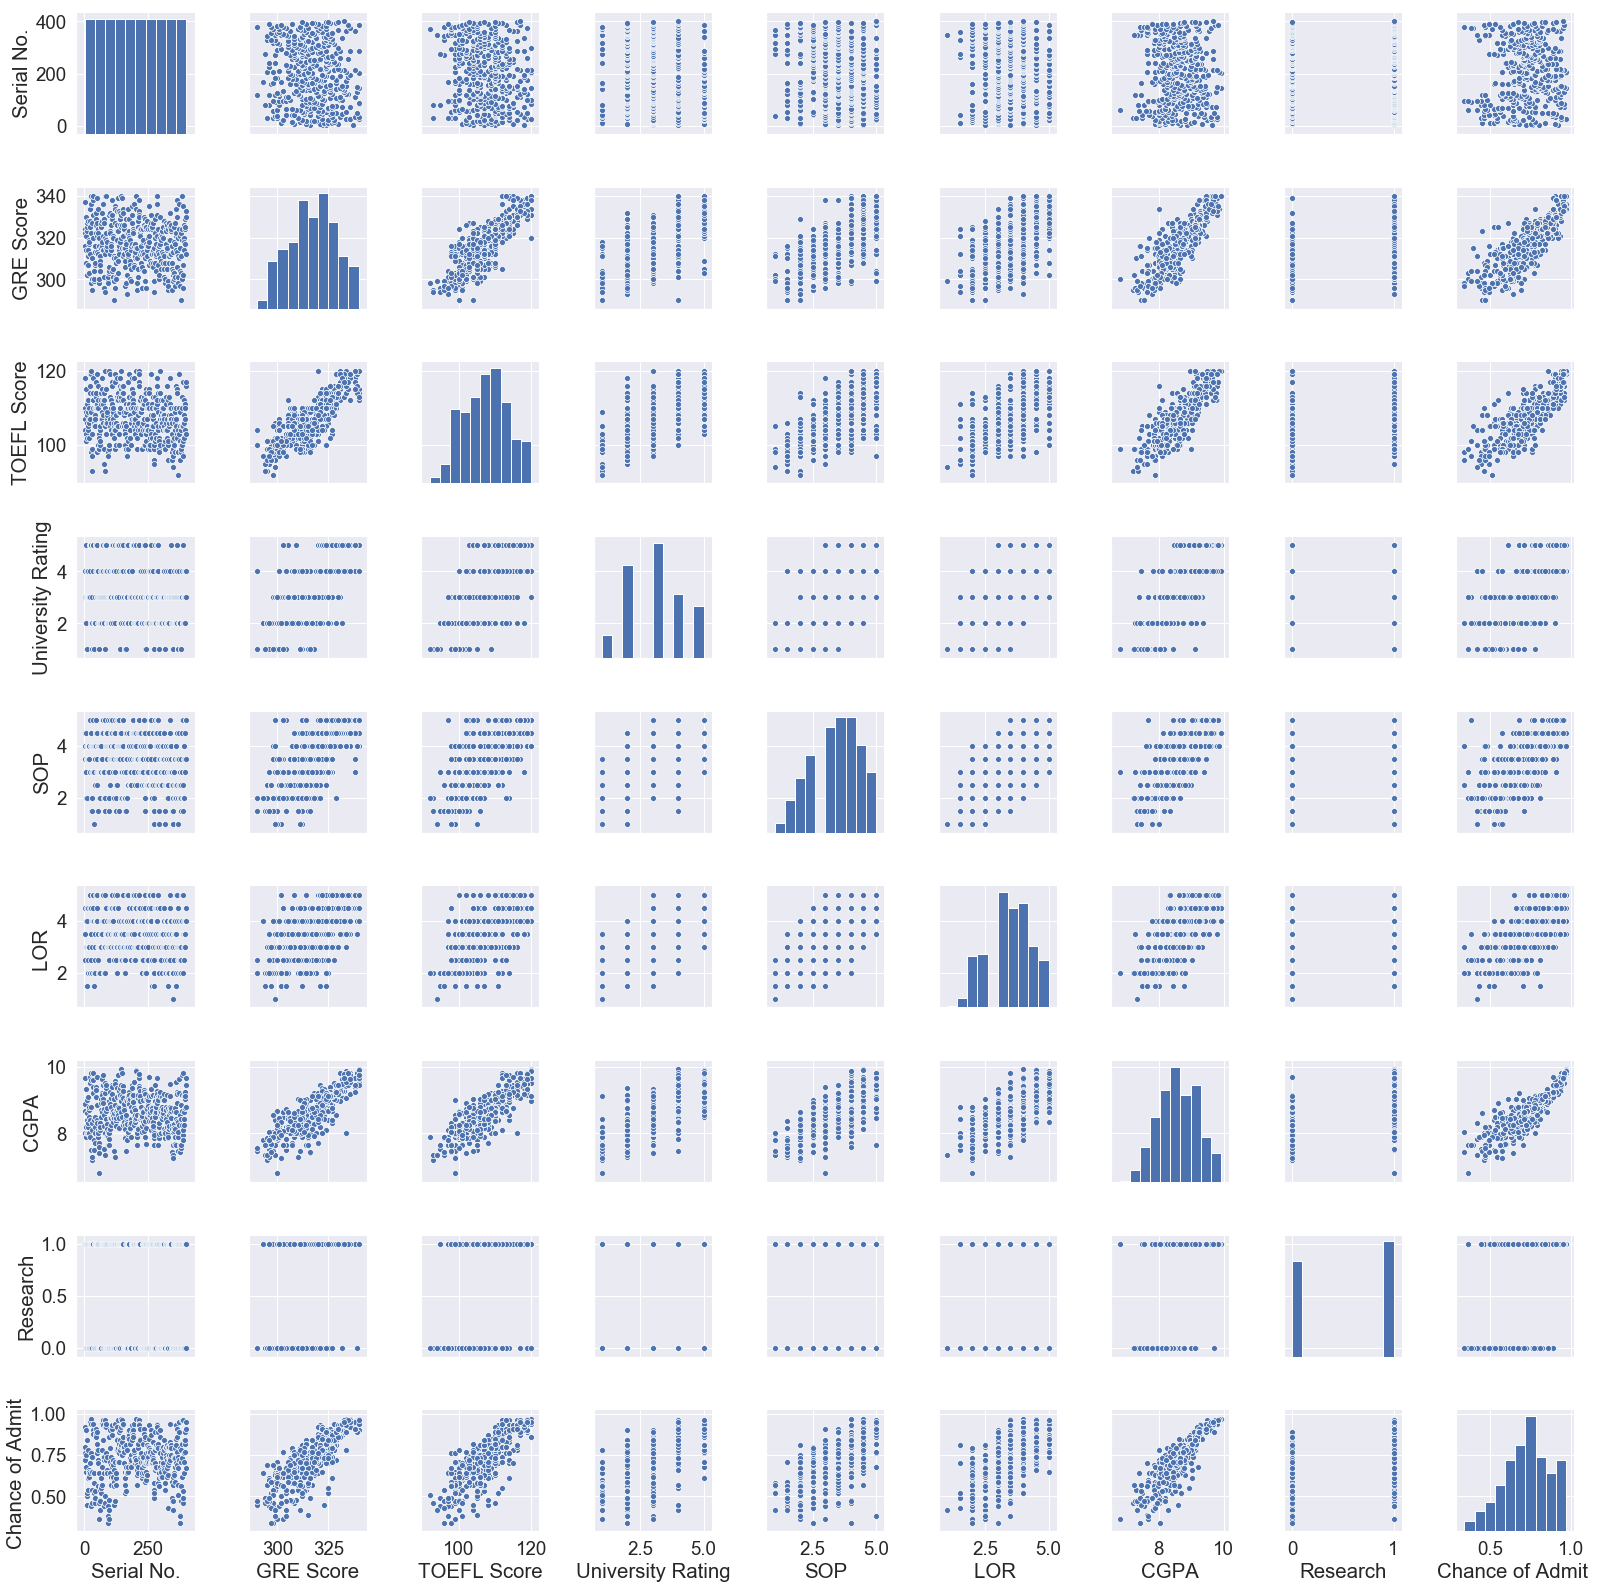

In [6]:
# set the pairplot parameters
sns.set(font_scale=1.7)
sns.pairplot(df)
plt.show()

The pairplot shows the linear and positive relationship between 'Chance of Admit' and 'CGPA', 'TOEFL', and 'GRE' score.

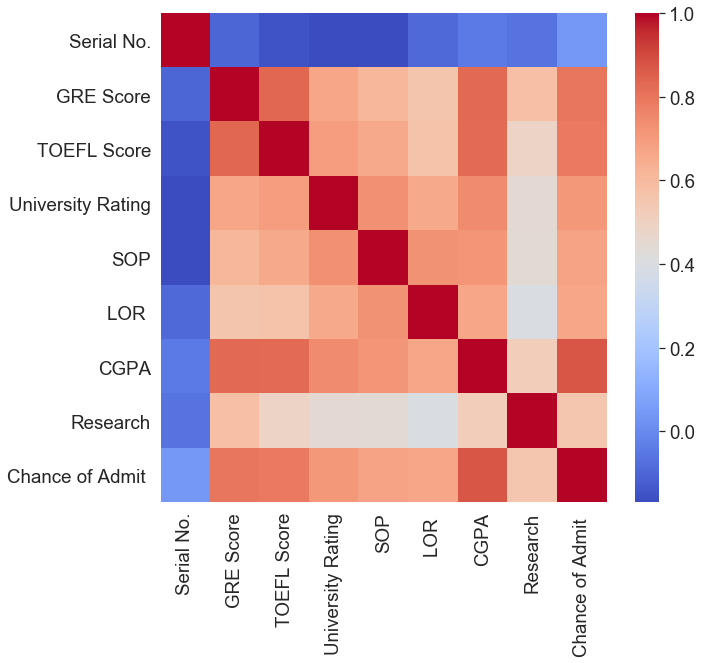

In [7]:
import seaborn as sns
plt.figure(figsize=(10,9))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.savefig('heatmat.png')

In the above heatmap, many of the features positively correlate with the Chance of Admittance.  Next, the 'Serial No.' column is dropped.

In [8]:
df = df.drop('Serial No.', 1)

In [9]:
# check the columns in the data
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Prepare the data for model building.  First, convert the outcome variable, 'Chance of Admit ', to a binary classification.  If the probablility of being accepted is 0.75 or higher, this is classified as a high probability of being accepted.  If the probability of being accepted is lower than 0.75, the chance of admittance is low.

In [10]:
df['Chance of Admit '] = (np.where(df['Chance of Admit '].values < 0.75, 0, 1))

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


Create the training and test data sets.

In [12]:
# shuffle data
df = df.sample(frac=1)

# Create training and test sets.
offset = int(df.shape[0] * 0.8)

df_train = df[:offset]
df_test = df[offset:]

print(df_train.shape)
print(df_test.shape)

(320, 8)
(80, 8)


# Build the model

#### MLP Classifier

In [13]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# set features and dependent variable for training data
y_train = df_train['Chance of Admit '].values
#y_train = y_train.astype('int')

# drop the 'Chance of Admit ' column to obtain the feature inputs
df_train.drop(['Chance of Admit '], axis=1, inplace=True)

# normalize the training data
x_train = sklearn.preprocessing.normalize(df_train)

# now for test...
y_test = df_test['Chance of Admit '].values.reshape(-1, 1)
#y_test = y_test.astype('int')

# drop the 'Chance of Admit ' column to obtain the feature inputs
df_test.drop(['Chance of Admit '], axis=1, inplace=True)

# normalize the test data
x_test = sklearn.preprocessing.normalize(df_test)

# Establish and fit the model.
mlc = MLPClassifier(hidden_layer_sizes=(500, 4, 4, 4,), max_iter=500000)
mlc.fit(x_train, y_train)

c:\users\fred\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
c:\users\fred\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 4, 4, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
y_test_pred = mlc.predict(x_test)
y_test_pred = y_test_pred.reshape(-1, 1)

print('\nMLP Confusion Matrix:') 
print(sklearn.metrics.confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None))

print('\nMLP Accuracy score:') 
print(sklearn.metrics.accuracy_score(y_test, y_test_pred, sample_weight=None))

print('\nMLP R^2 for training:') 
print(mlc.score(x_train, y_train))

print('\nMLP R^2 for test:') 
print(mlc.score(x_test, y_test))


MLP Confusion Matrix:
[[44  0]
 [36  0]]

MLP Accuracy score:
0.55

MLP R^2 for training:
0.55

MLP R^2 for test:
0.55


Calculate the cross-validation scores for 10 folds.

In [15]:
from sklearn.model_selection import cross_val_score

print('\nAverage cross_val_score for test:') 
print(np.mean(cross_val_score(mlc, x_test, y_test, cv=10)))


Average cross_val_score for test:


c:\users\fred\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\fred\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\fred\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\fred\appdata\local\programs\python\python37

0.5507936507936508


#### Random Forest Classifier

In [16]:
# 3.  Random Forest Classifier

from datetime import datetime
start_time = datetime.now()

from sklearn.ensemble import RandomForestClassifier

# Instantiate our model.
rfc = RandomForestClassifier(n_estimators=500)

# fit model to data
rfc.fit(x_train, y_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Duration: 0:00:00.666038


In [17]:
print('\nFeature importances:') 
print(rfc.feature_importances_)


Feature importances:
[0.08212212 0.07325124 0.15918637 0.1487636  0.09742507 0.26079375
 0.17845784]


In [18]:
y_test_pred = rfc.predict(x_test)

print('\nMLP Confusion Matrix:') 
print(sklearn.metrics.confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None))

print('\nMLP Accuracy score:') 
print(sklearn.metrics.accuracy_score(y_test, y_test_pred, sample_weight=None))

print('\nMLP R^2 for training:') 
print(rfc.score(x_train, y_train))

print('\nMLP R^2 for test:') 
print(rfc.score(x_test, y_test))


MLP Confusion Matrix:
[[42  2]
 [ 6 30]]

MLP Accuracy score:
0.9

MLP R^2 for training:
1.0

MLP R^2 for test:
0.9


In [19]:
from sklearn.model_selection import cross_val_score
# cross_val_score(mlp, X, Y, cv=10)

print('\nAverage cross_val_score for test:') 
print(np.mean(cross_val_score(rfc, x_test, y_test, cv=10)))


Average cross_val_score for test:


c:\users\fred\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\fred\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\fred\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\fred\appdata\local\programs\

0.8829365079365079


# Evaluation
MLP Model:
- The confusion matrix shows 44 true negatives, 0 true positives, 36 false negatives, 0 false positives
- MLP accuracy score = 0.55
- MLP R^2 for training = 0.55
- MLP R^2 for test = 0.55   
- MLP average cross_val_score = 0.551  

Random Forest Model:  
- The confusion matrix shows 42 true negatives, 30 true positives, 6 false negatives, 2 false positives
- RF accuracy score = 0.90
- RF R^2 for training = 1.0
- RF R^2 for test = 0.90
- RF average cross_val_score = 0.883

# Conclusion and discussion
The random forest model is much better in every way.  

Since this model only has 400 rows and 8 features, a neural network model does not do well.  Reasons need to be investigated further.